In [1]:
from pathlib import Path
notebook_path = Path().cwd().parent.parent.parent.parent
import sys; sys.path.insert(0, str(notebook_path))

import pandas as pd
import matplotlib.pyplot as plt

# Custom imports
from explore.gcp.storage import gcp
from explore.src.utilities.eda_funcs import describe_data
from explore.src.data.valuations_dfs import TeamValues
from explore.src.visualisation.exploratory_visuals import StatisticPlots
from explore.src.visualisation.valuations_visual import TeamValsPlots

pd.set_option('display.max_columns', None)

In [2]:
# read in ligue 1 team data
df = gcp.read_df_from_bucket(bucket_name='processed_transfermarkt_db', blob_name='processed_ligue_1_team_data.csv')

[03/21/24 18:20:14] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:28 ] - Getting GCP bucket                                 ]8;id=112817;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=308755;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#28\28]8;;\

[03/21/24 18:20:15] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:33 ] - GCP bucket retrieved                               ]8;id=450208;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=954771;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#33\33]8;;\

In [3]:
df.head()

,team_id,team,other_names,squad_size,squad_avg_age,squad_foreigners,average_value_euro_mill,total_value_euro_mill,season,team_season,foreigner_pct
0,583,Paris Saint-Germain,fc-paris-saint-germain,35,25.0,19,25.72,900.1,2017,Paris Saint-Germain - 2017,54.29
1,162,AS Monaco,as-monaco,38,23.5,26,13.94,529.8,2017,AS Monaco - 2017,68.42
2,1041,Olympique Lyon,olympique-lyon,34,23.1,21,10.70,363.8,2017,Olympique Lyon - 2017,61.76
3,244,Olympique Marseille,olympique-marseille,29,26.8,13,8.17,236.8,2017,Olympique Marseille - 2017,44.83
4,417,OGC Nice,ogc-nizza,39,23.6,16,5.23,204.1,2017,OGC Nice - 2017,41.03


In [4]:
df.shape

(138, 11)

In [5]:
TeamValues(df).pipeline()

,team_id,team,other_names,squad_size,squad_avg_age,squad_foreigners,average_value_euro_mill,total_value_euro_mill,season,team_season,foreigner_pct
0,583,Paris Saint-Germain,fc-paris-saint-germain,35,25.0,19,25.72,900.10,2017,Paris Saint-Germain - 2017,54.29
1,162,AS Monaco,as-monaco,38,23.5,26,13.94,529.80,2017,AS Monaco - 2017,68.42
2,1041,Olympique Lyon,olympique-lyon,34,23.1,21,10.70,363.80,2017,Olympique Lyon - 2017,61.76
3,244,Olympique Marseille,olympique-marseille,29,26.8,13,8.17,236.80,2017,Olympique Marseille - 2017,44.83
4,417,OGC Nice,ogc-nizza,39,23.6,16,5.23,204.10,2017,OGC Nice - 2017,41.03
...,...,...,...,...,...,...,...,...,...,...,...
133,415,FC Toulouse,fc-toulouse,31,22.9,24,2.74,85.05,2023,FC Toulouse - 2023,77.42
134,3911,Stade Brestois 29,stade-brest-29,25,25.5,7,3.23,80.80,2023,Stade Brestois 29 - 2023,28.00
135,738,Le Havre AC,ac-le-havre,30,25.0,17,2.06,61.65,2023,Le Havre AC - 2023,56.67
136,3524,Clermont Foot 63,clermont-foot-63,23,26.7,14,2.08,47.90,2023,Clermont Foot 63 - 2023,60.87


In [6]:
describe_data(df)

,Data Types,Null Counts,Null %,Unique Values,Min,Max,Median,Mean,Std Dev,Outliers,Outliers %
team_id,int64,0,0.0,29,40.000,3911.00,855.00,987.96,883.17,12,8.70
squad_size,int64,0,0.0,25,23.000,57.00,35.00,35.17,5.46,2,1.45
squad_avg_age,float64,0,0.0,42,22.000,27.30,24.80,24.74,0.98,0,0.00
squad_foreigners,int64,0,0.0,24,7.000,37.00,19.00,19.25,4.97,2,1.45
average_value_euro_mill,float64,0,0.0,123,0.659,34.98,3.44,5.60,5.58,7,5.07
total_value_euro_mill,float64,0,0.0,134,27.000,1050.00,113.55,196.38,198.85,8,5.80
season,int64,0,0.0,7,2017.000,2023.00,2020.00,2019.96,1.99,0,0.00
foreigner_pct,float64,0,0.0,102,28.000,84.62,53.22,54.70,11.21,1,0.72


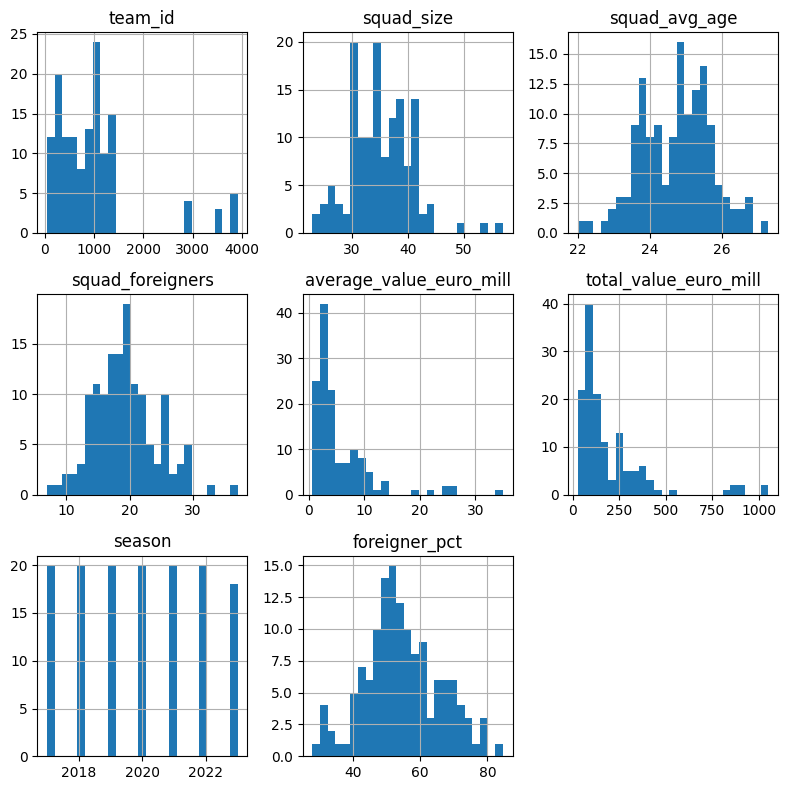

In [7]:
df.hist(bins=25, figsize=(8, 8))
plt.tight_layout()
plt.show()

Statistical plots

In [8]:
stat_plots = StatisticPlots(df)

In [9]:
cols = df.select_dtypes(include='number').columns[1:]

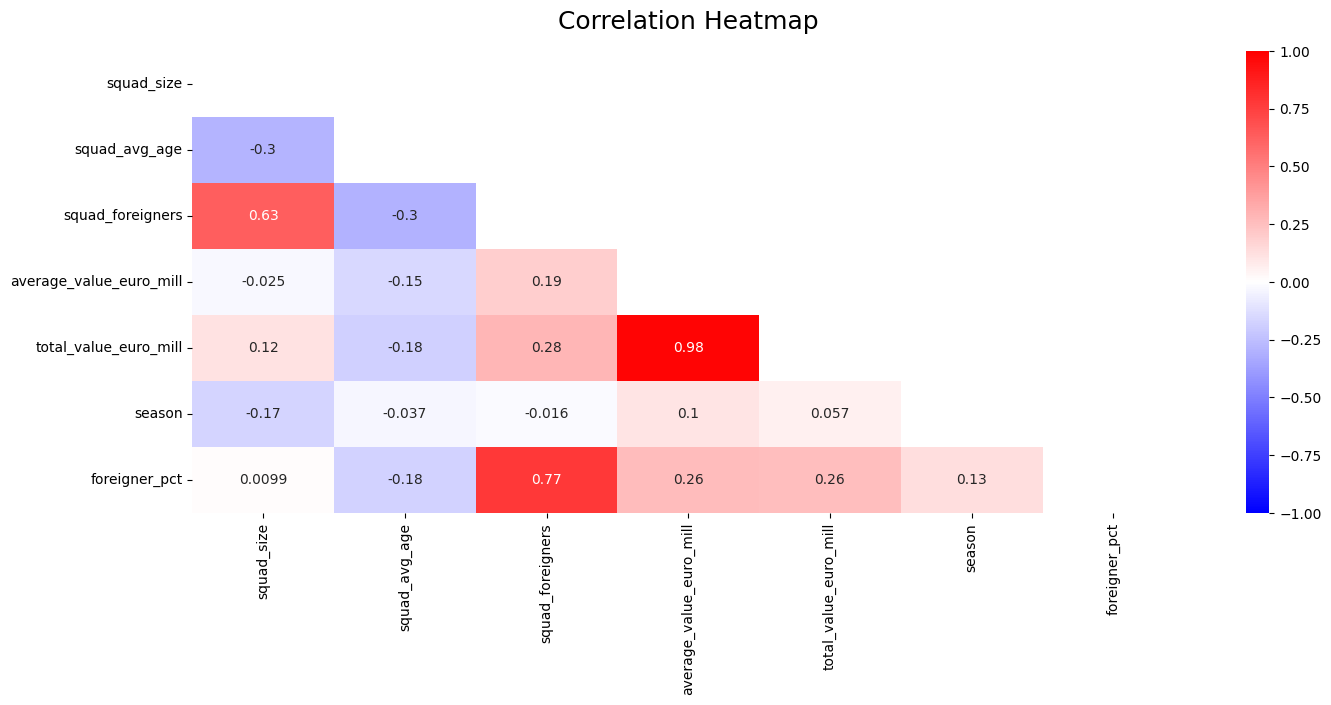

In [10]:
stat_plots.correlation_matrix(vars=cols)

Relationship between total market value and other variables

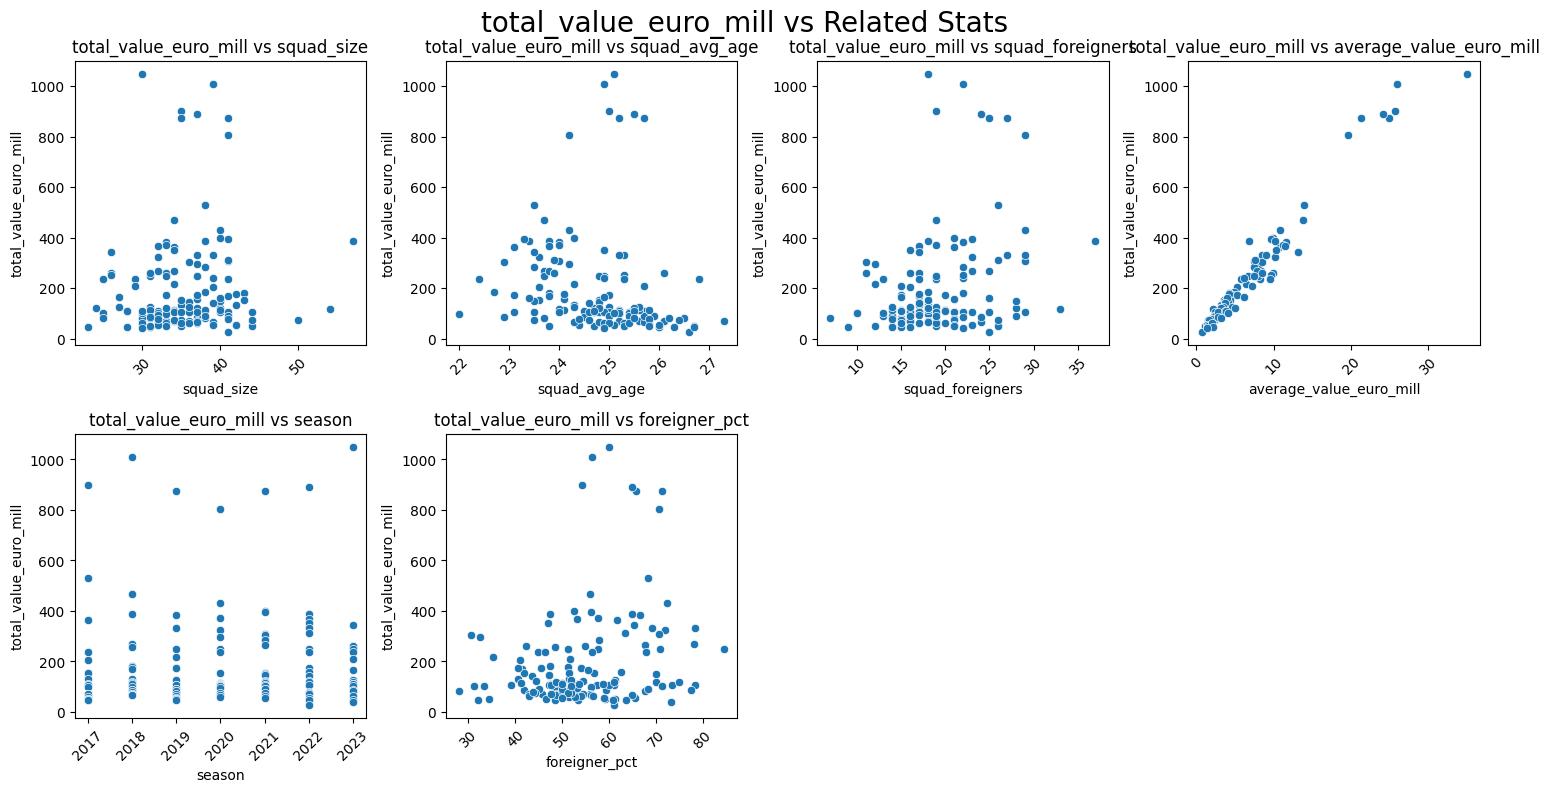

In [11]:
stat_plots.relationships(y='total_value_euro_mill', X=cols)

Relationships between season and each variable

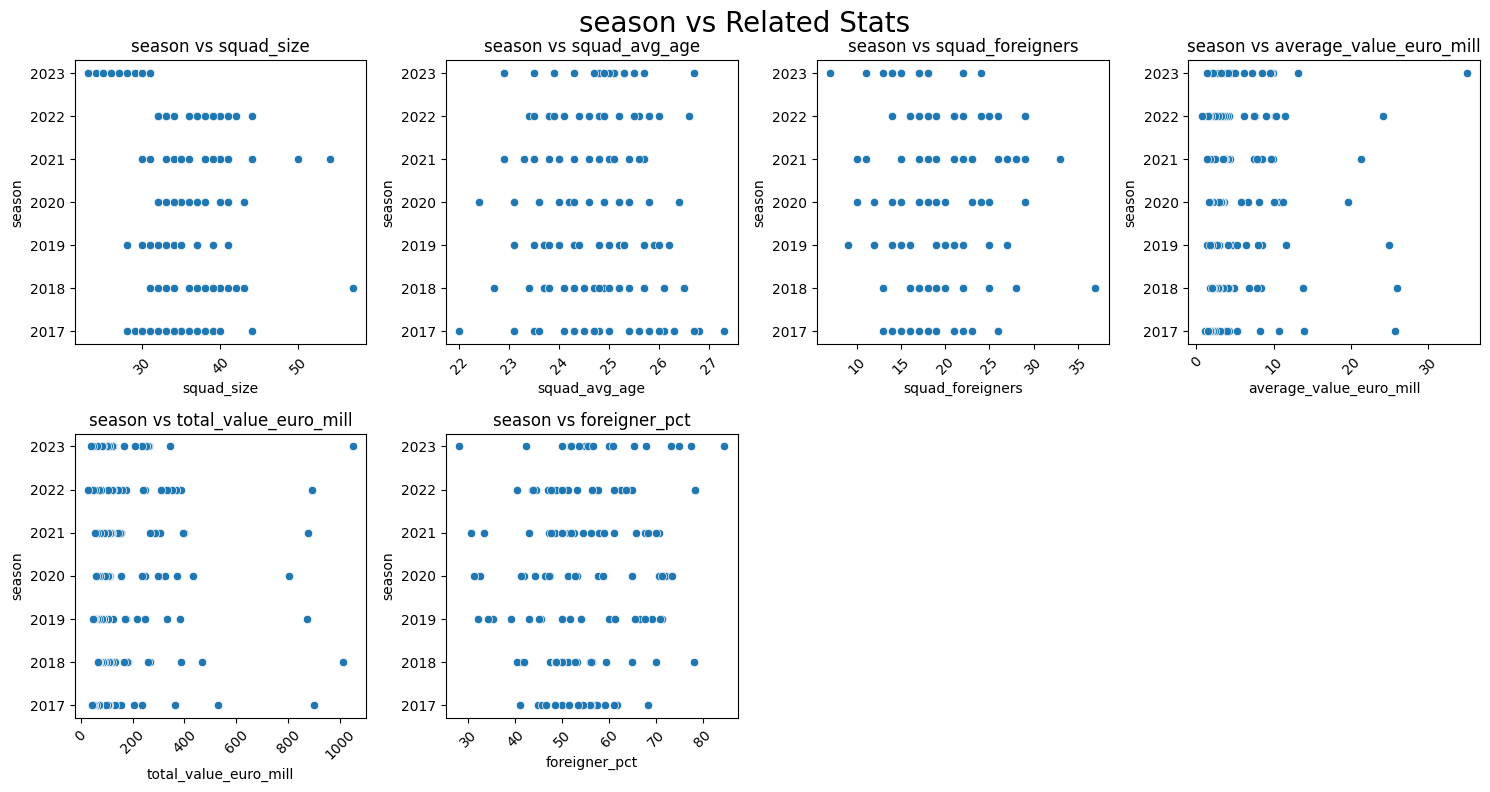

In [12]:
stat_plots.relationships(y='season', X=cols)

In [13]:
plots = TeamValsPlots(df)

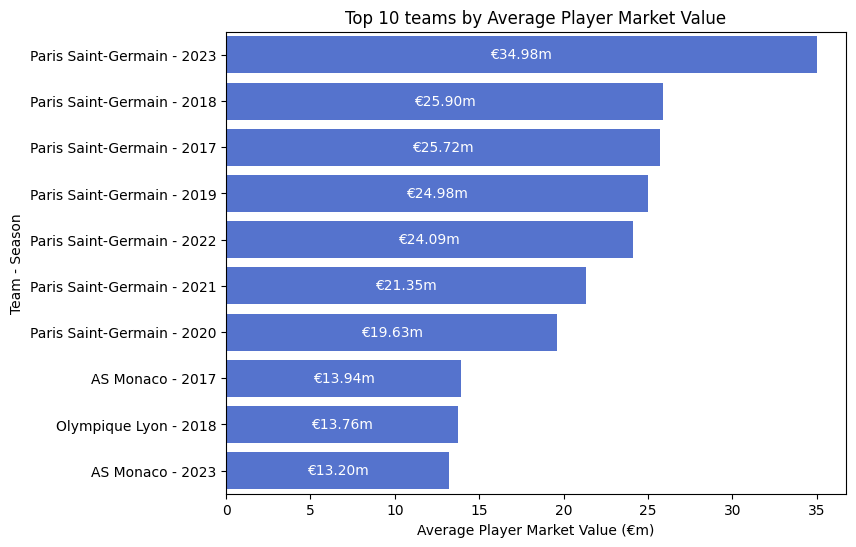

In [14]:
plots.top_10_plot('average_value_euro_mill')
plt.xlabel("Average Player Market Value (€m)")
plt.ylabel("Team - Season")
plt.title("Top 10 teams by Average Player Market Value")
plt.show()

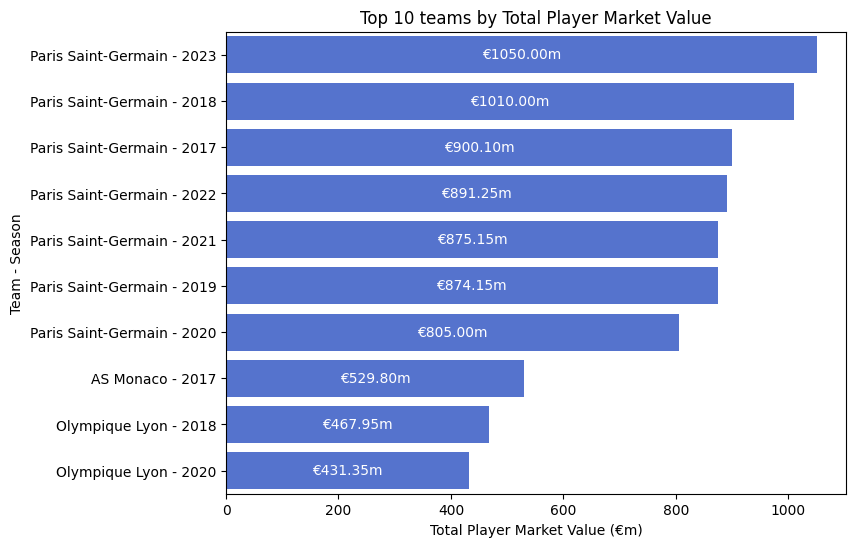

In [15]:
plots.top_10_plot('total_value_euro_mill')
plt.xlabel("Total Player Market Value (€m)")
plt.ylabel("Team - Season")
plt.title("Top 10 teams by Total Player Market Value")
plt.show()

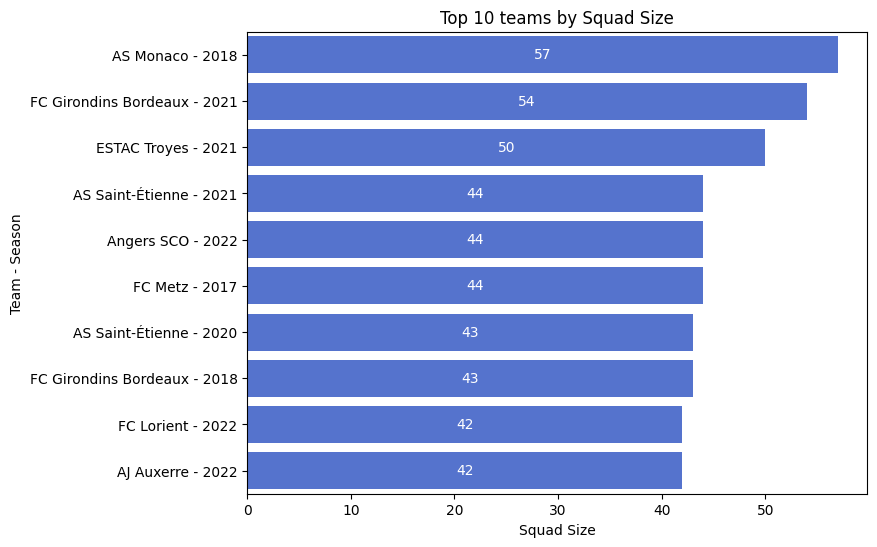

In [16]:
plots.top_10_plot("squad_size")
plt.xlabel("Squad Size")
plt.ylabel("Team - Season")
plt.title("Top 10 teams by Squad Size")
plt.show()

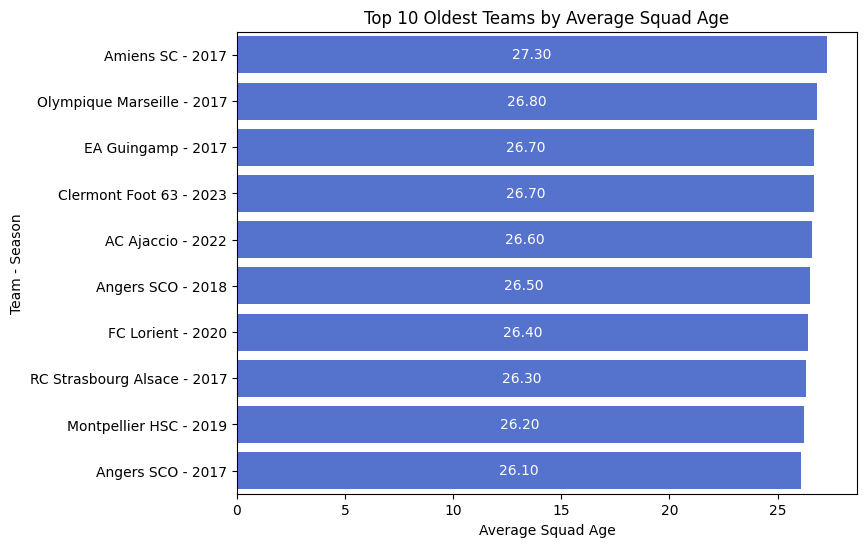

In [17]:
plots.top_10_plot("squad_avg_age")
plt.xlabel("Average Squad Age")
plt.ylabel("Team - Season")
plt.title("Top 10 Oldest Teams by Average Squad Age")
plt.show()

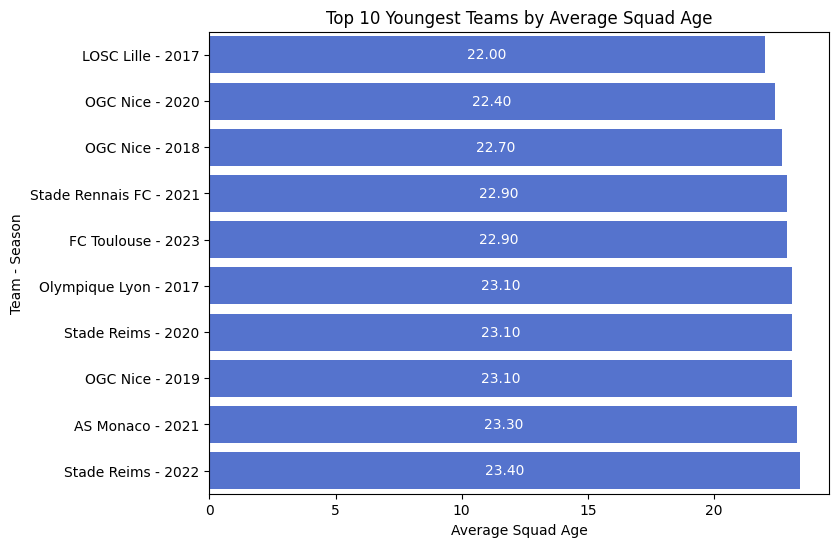

In [18]:
plots.top_10_plot("squad_avg_age", ascend=True)
plt.xlabel("Average Squad Age")
plt.ylabel("Team - Season")
plt.title("Top 10 Youngest Teams by Average Squad Age")
plt.show()

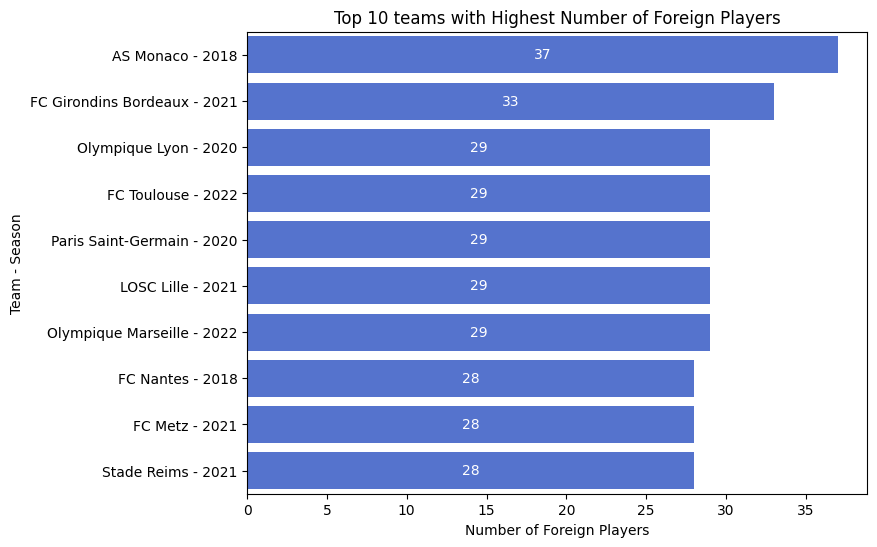

In [19]:
plots.top_10_plot("squad_foreigners")
plt.xlabel("Number of Foreign Players")
plt.ylabel("Team - Season")
plt.title("Top 10 teams with Highest Number of Foreign Players")
plt.show()

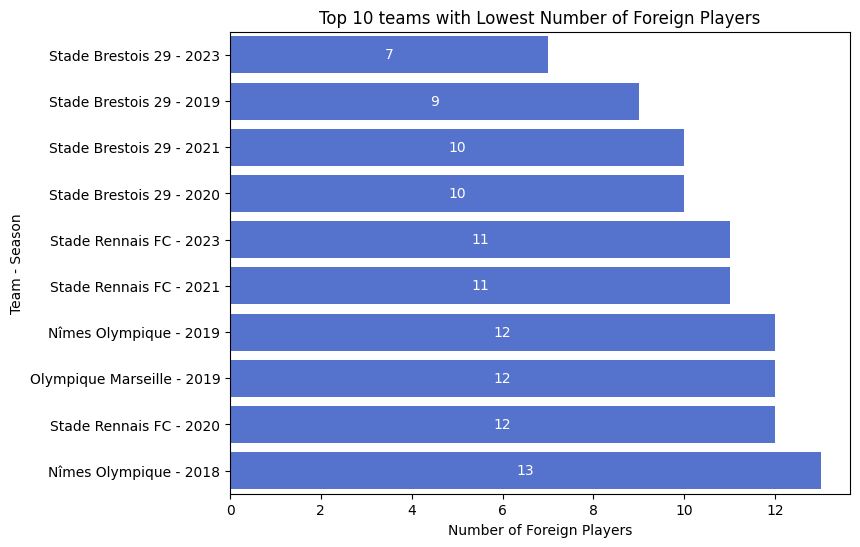

In [20]:
plots.top_10_plot("squad_foreigners", ascend=True)
plt.xlabel("Number of Foreign Players")
plt.ylabel("Team - Season")
plt.title("Top 10 teams with Lowest Number of Foreign Players")
plt.show()

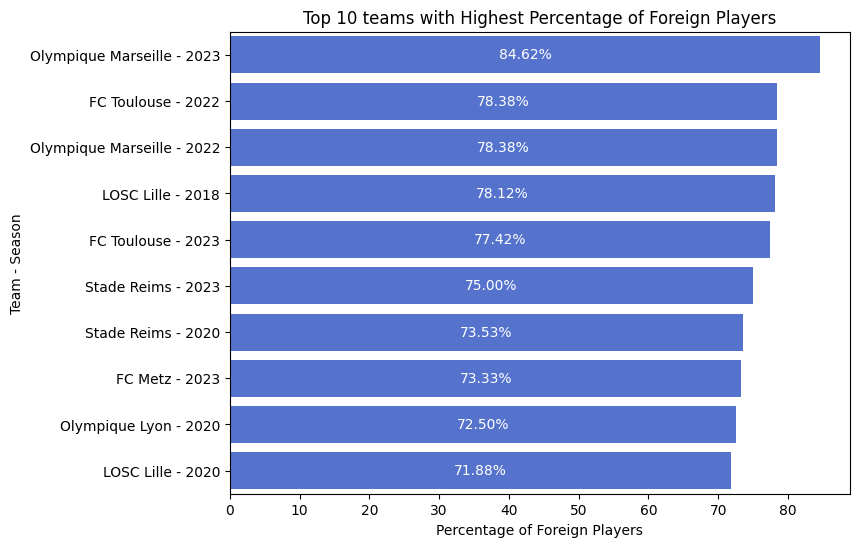

In [21]:
plots.top_10_plot("foreigner_pct")
plt.xlabel("Percentage of Foreign Players")
plt.ylabel("Team - Season")
plt.title("Top 10 teams with Highest Percentage of Foreign Players")
plt.show()

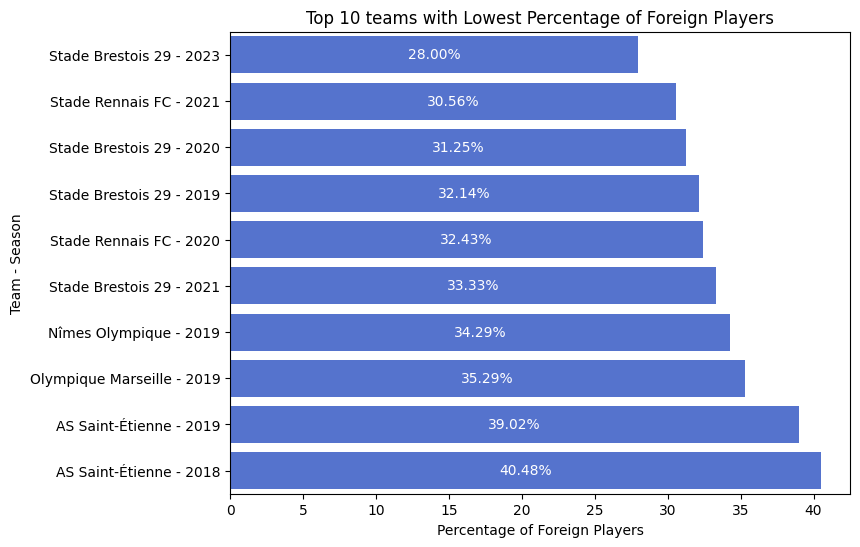

In [22]:
plots.top_10_plot("foreigner_pct", ascend=True)
plt.xlabel("Percentage of Foreign Players")
plt.ylabel("Team - Season")
plt.title("Top 10 teams with Lowest Percentage of Foreign Players")
plt.show()

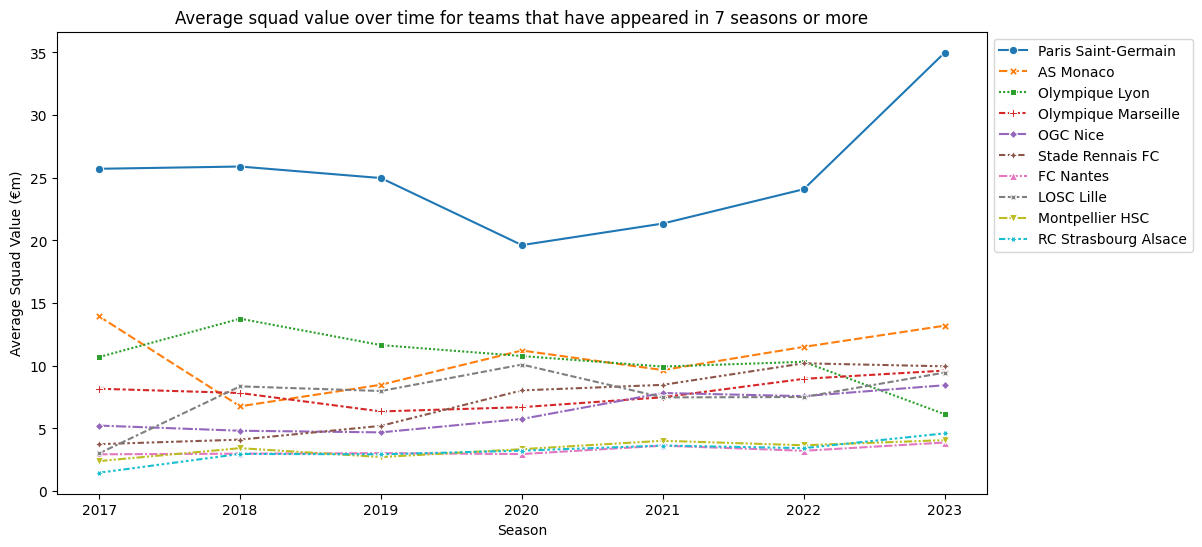

In [23]:
plots.time_series_plot(column='average_value_euro_mill', seasons=7)
plt.show()

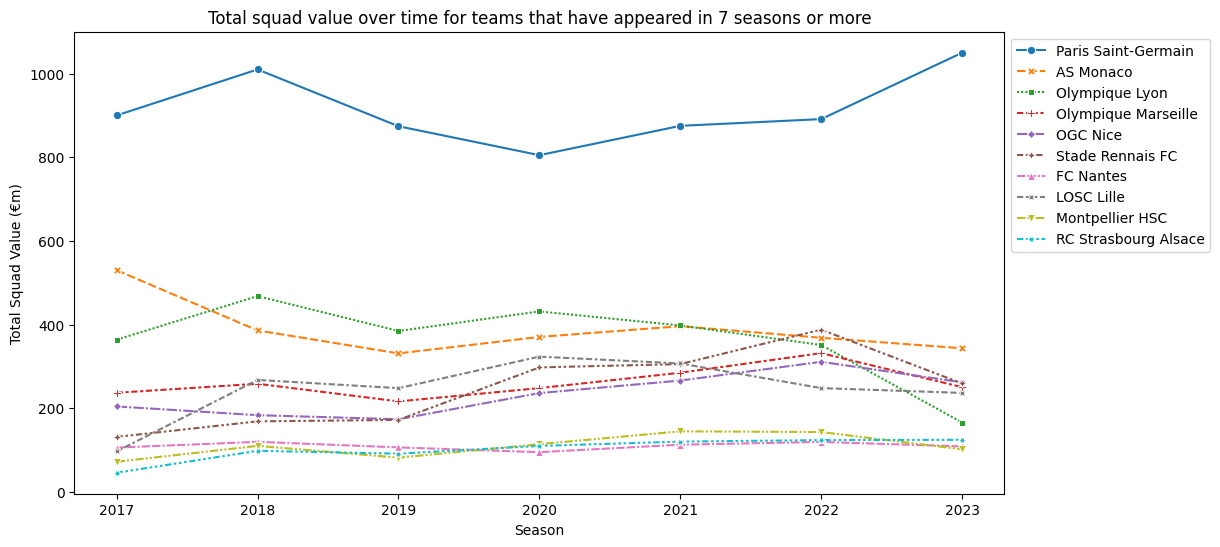

In [24]:
plots.time_series_plot(column='total_value_euro_mill', seasons=7)
plt.show()